# Tarea Semanal 12

## Punto 1 


## Analitico
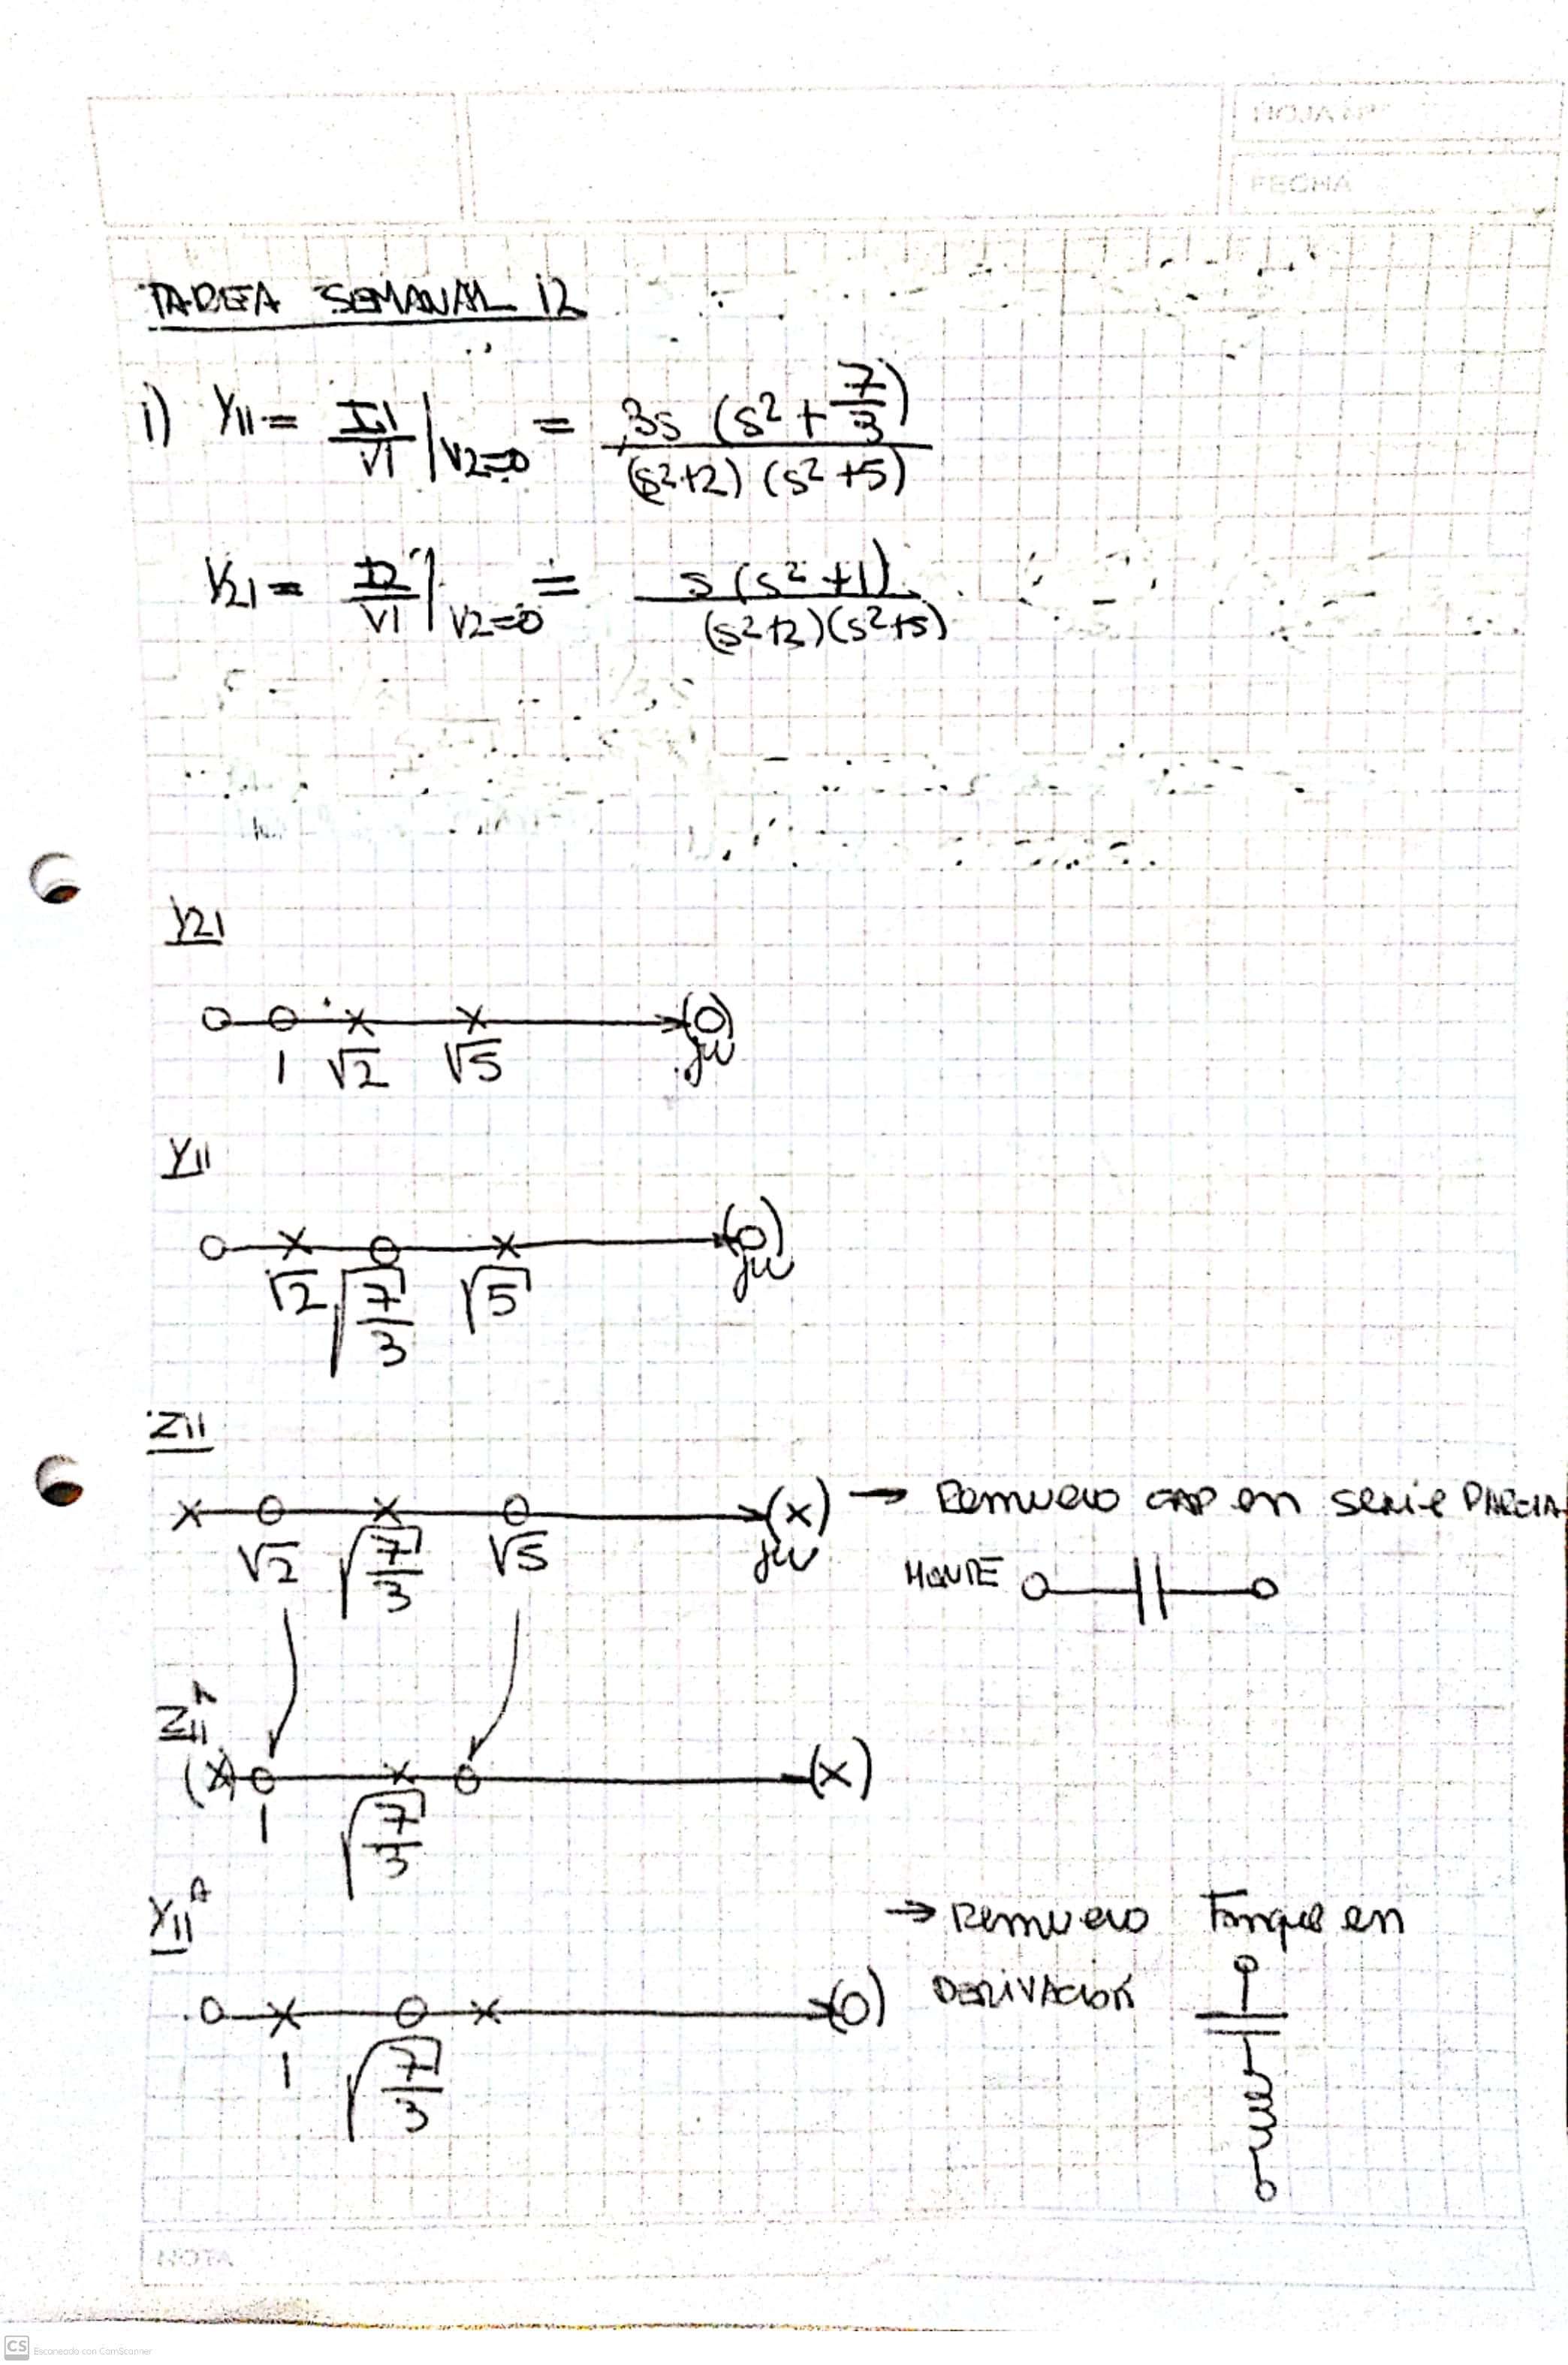

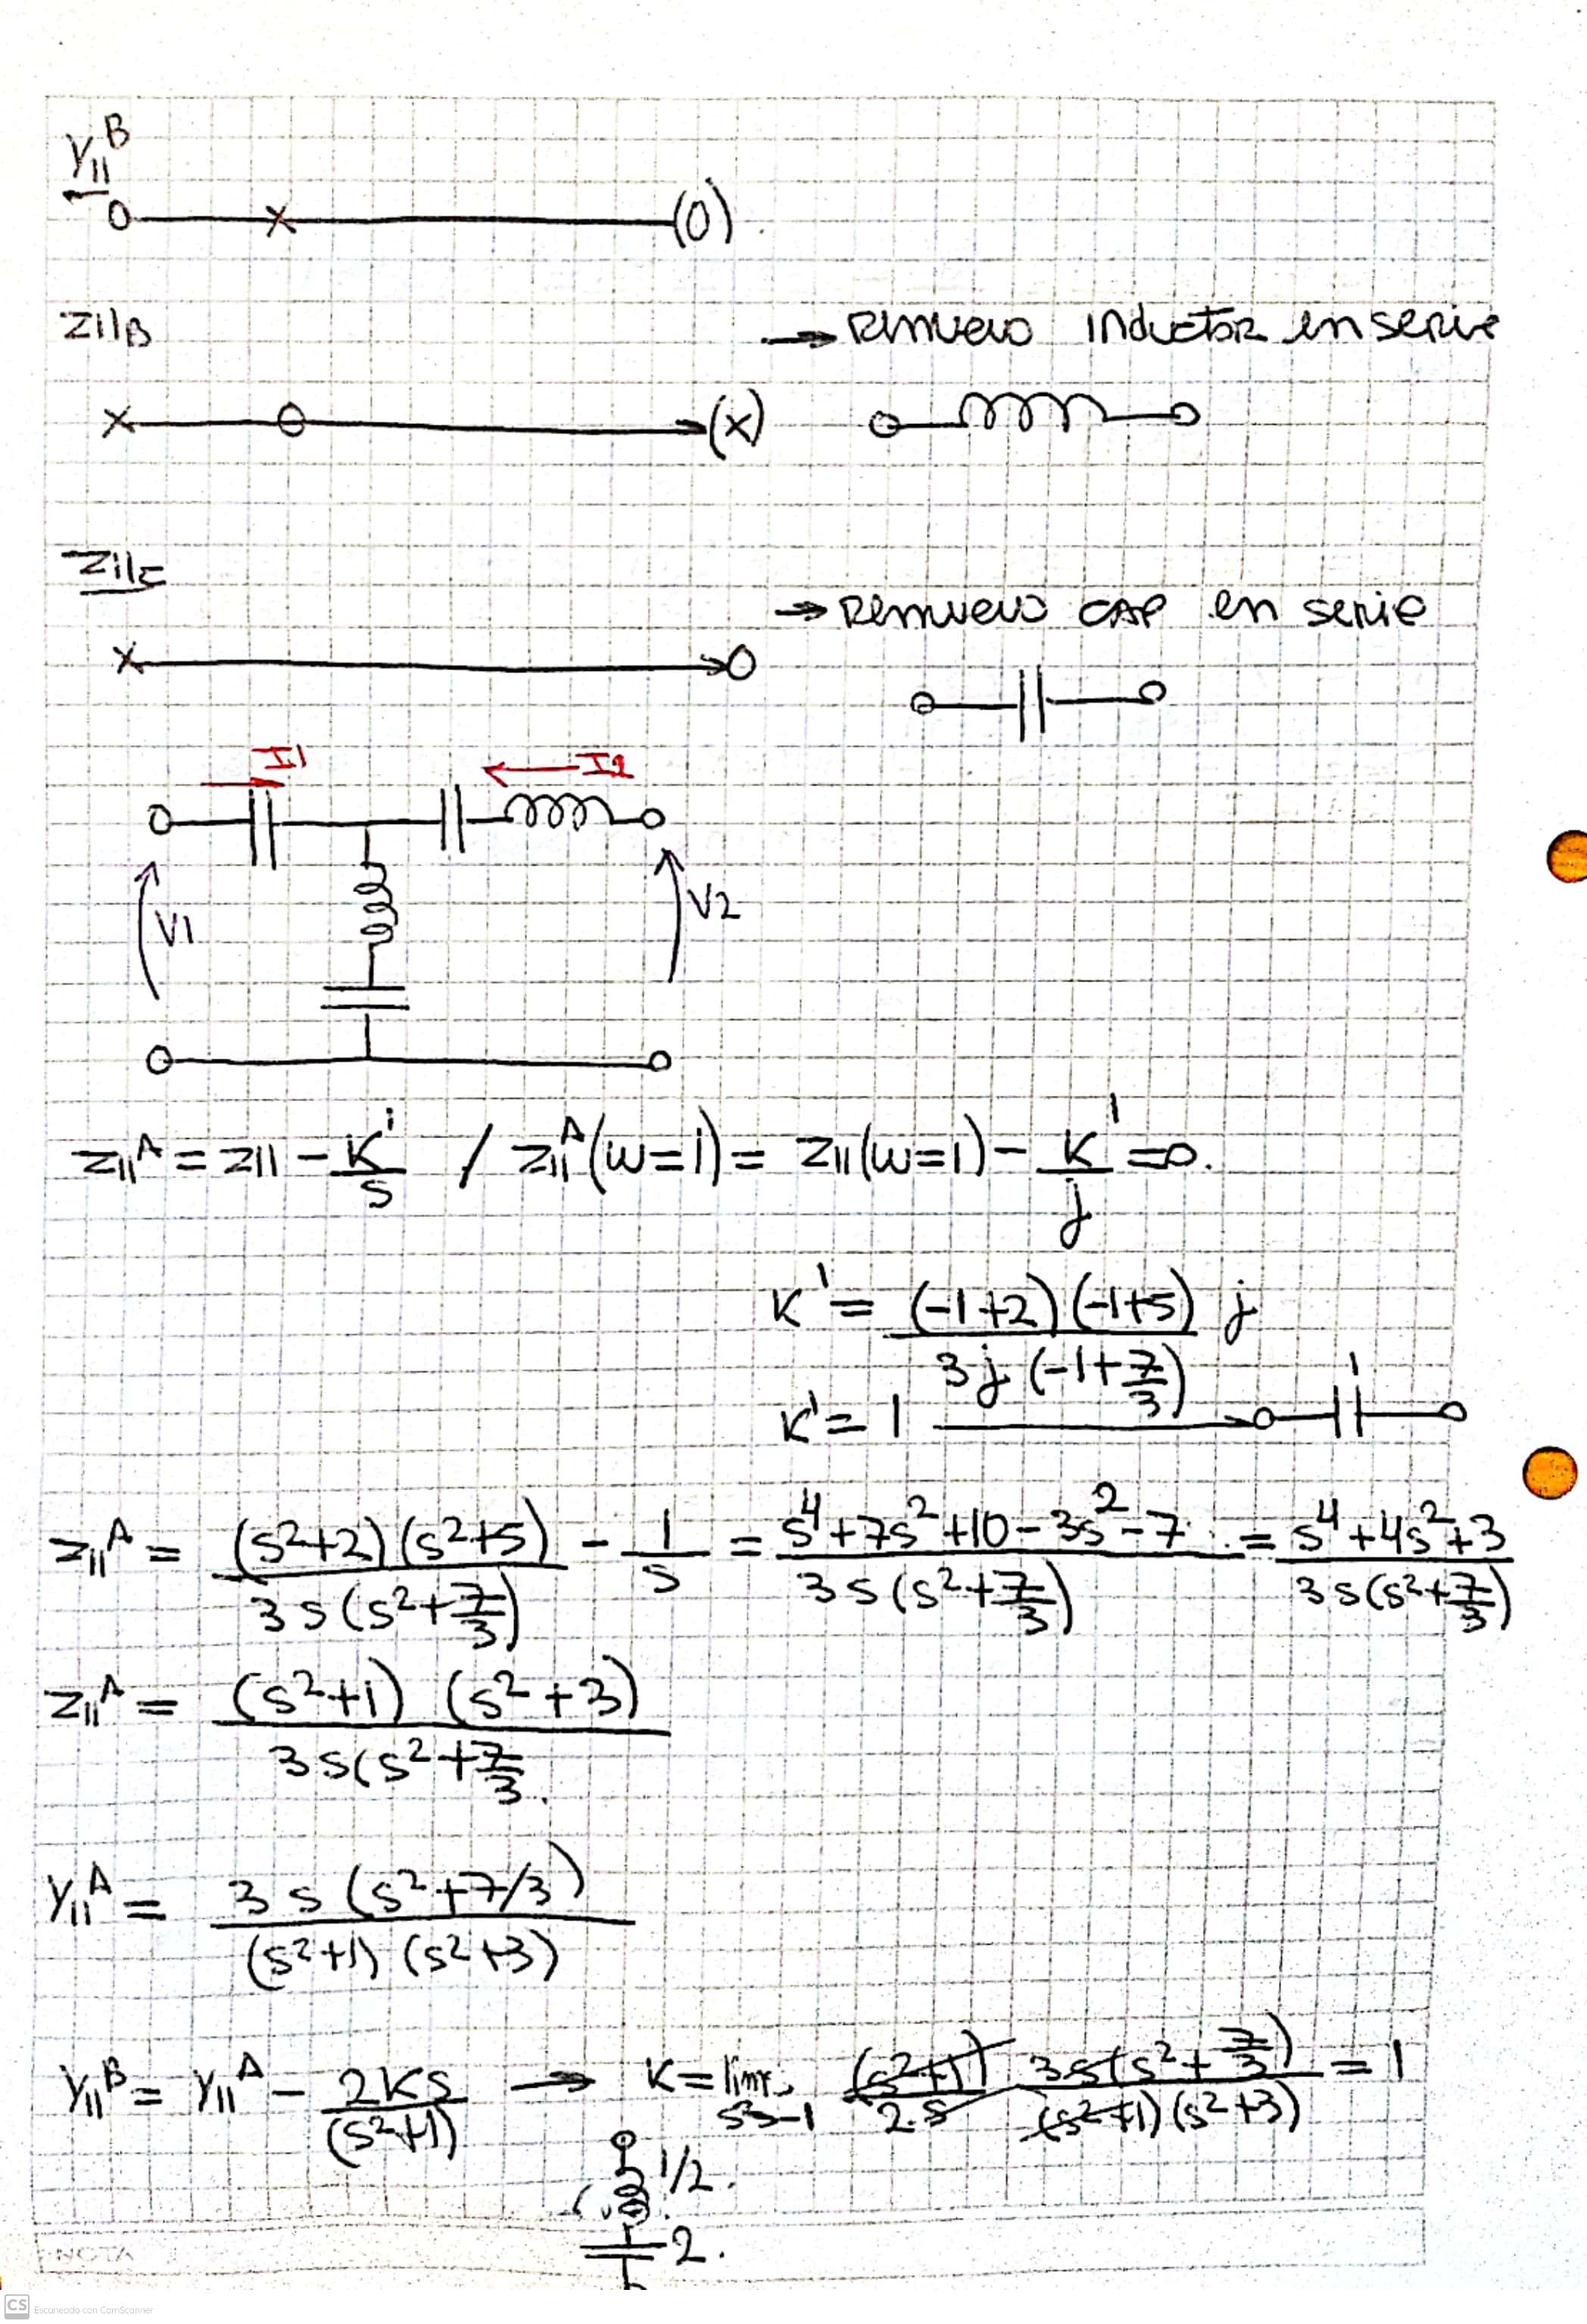

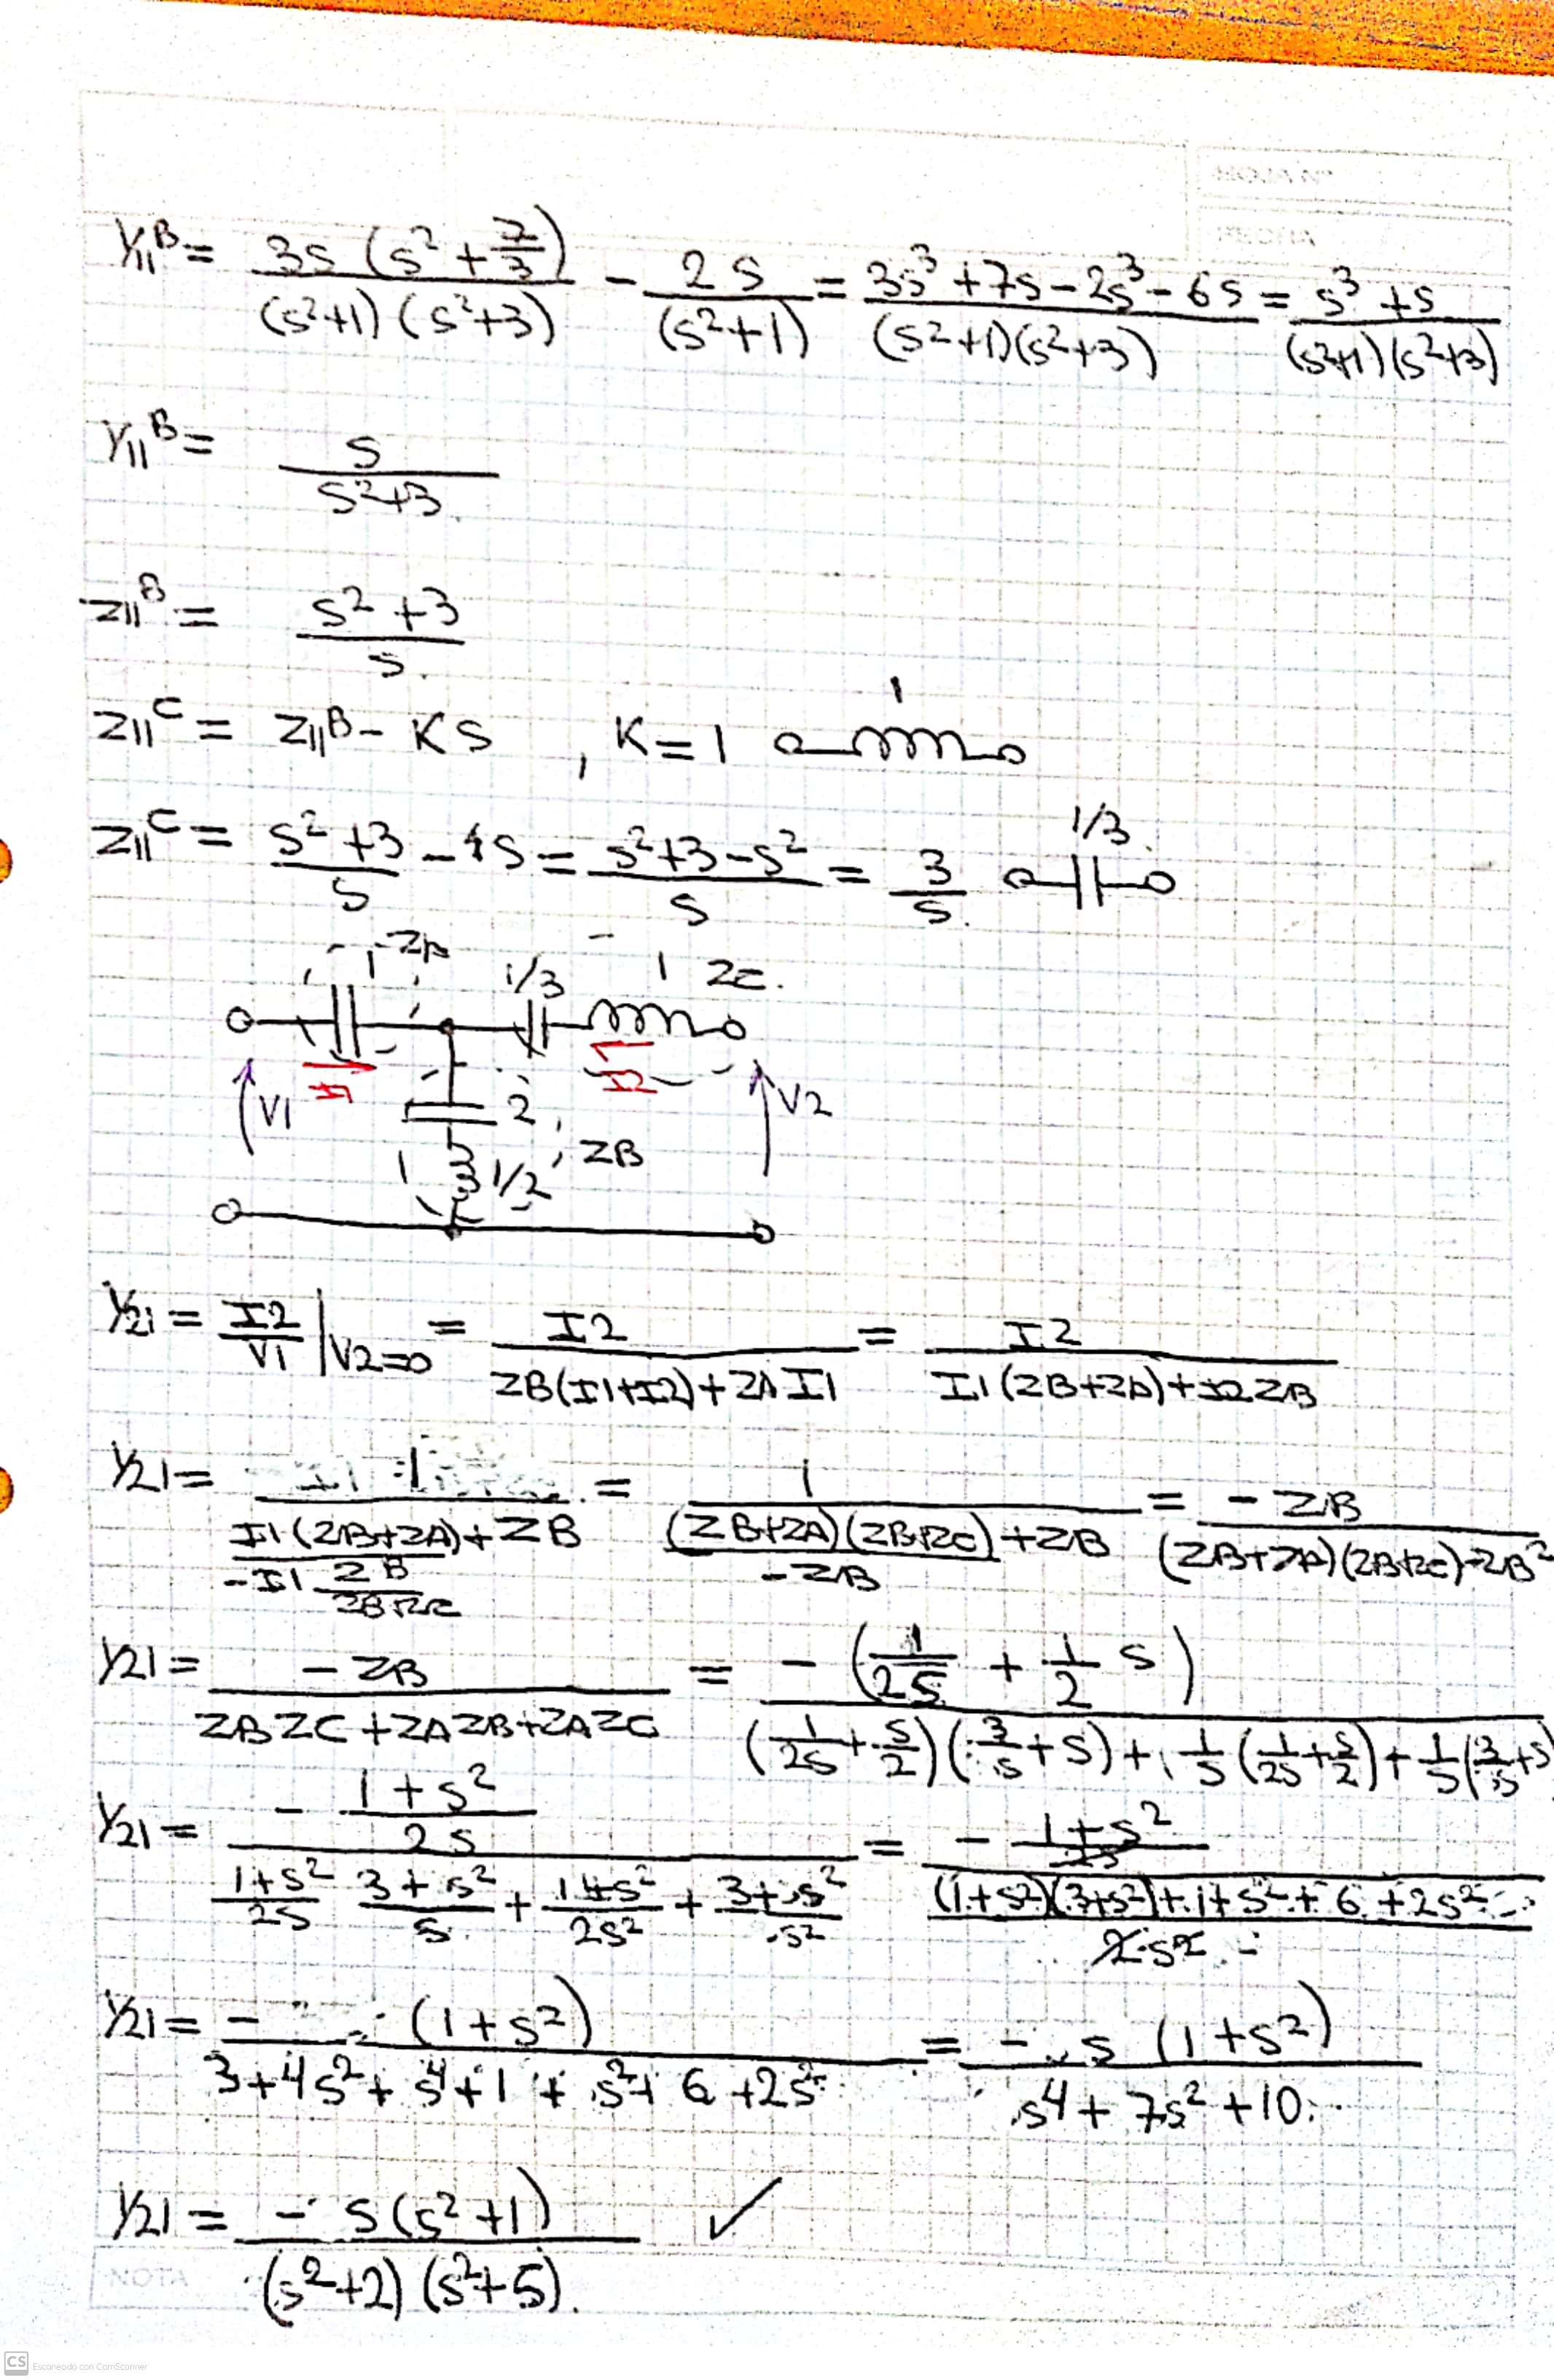

## Simulacion

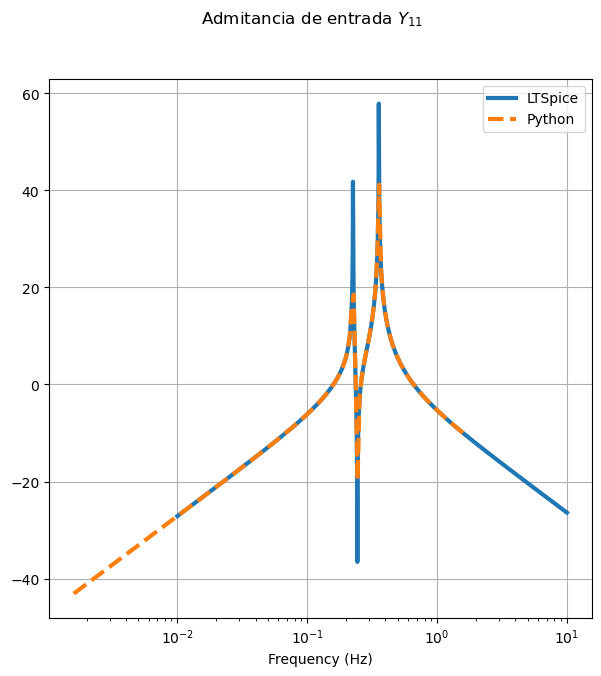

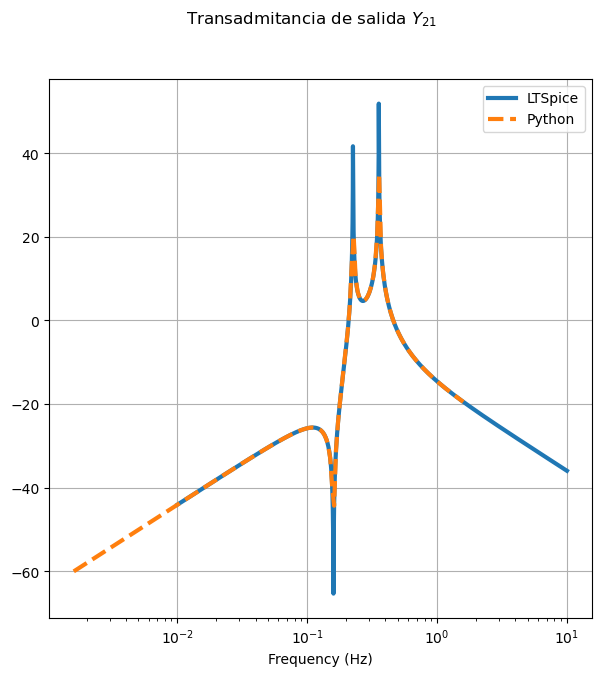

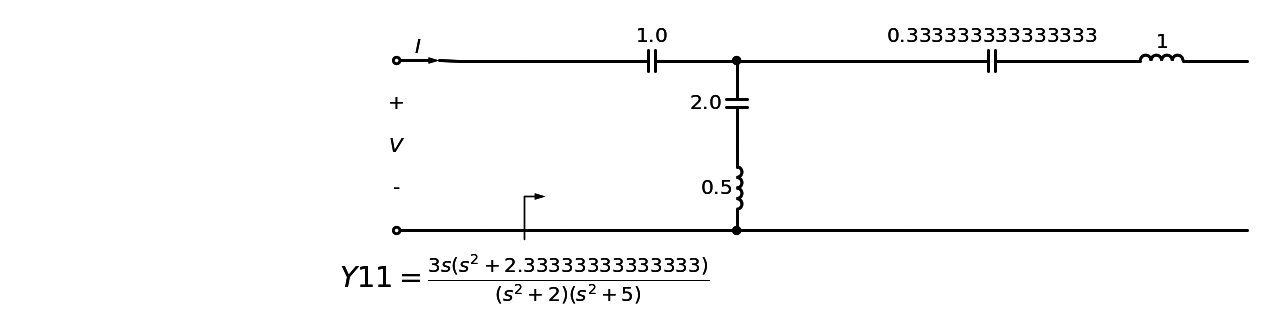

In [12]:

import ltspice

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

import splane as splane
import sympy as sim

from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor

#%% Punto 1
l = ltspice.Ltspice('TS12_1.raw')
l.parse()


freq = l.get_frequency()
Y11 =l.get_data('I(V1)')
Y21 =l.get_data('I(L2)')


plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(7,7))
fig1.suptitle(r'Admitancia de entrada $Y_{11}$')
fig2, ax2 = plt.subplots(1, 1, figsize=(7,7))
fig2.suptitle(r'Transadmitancia de salida $Y_{21}$')
ax1.semilogx(freq, 20 * np.log10(np.abs(Y11)), label='LTSpice',linewidth=3)
ax2.semilogx(freq, 20 * np.log10(np.abs(Y21)), label='LTSpice',linewidth=3)


ax1.grid()
ax2.grid()
ax1.set_xlabel("Frequency (Hz)")
ax2.set_xlabel("Frequency (Hz)")


num_Y11 = np.array(np.convolve(np.array([0,3,0]),np.array([1,0,7/3])))
den_Y11 = np.array(np.convolve(np.array([1,0,2]),np.array([1,0,5])))

num_Y21 = np.array(np.convolve(np.array([0,1,0]),np.array([1,0,1])))
den_Y21 = np.array(np.convolve(np.array([1,0,2]),np.array([1,0,5])))

w,H_11 = sig.freqs(num_Y11,den_Y11)
w,H_21 = sig.freqs(num_Y21,den_Y21)

ax1.semilogx(w/(2*np.pi),20*np.log10(np.abs(H_11)),label='Python',ls='--',linewidth=3)
ax2.semilogx(w/(2*np.pi),20*np.log10(np.abs(H_21)),label='Python',ls='--',linewidth=3)

ax1.legend()
ax2.legend()
plt.show()

#%% Mediante Modulo de splane

s = sim.symbols('s ', complex=True)

Y11 = 3*s*(s**2+7/3)/((s**2+2)*(s**2+5))

Z11=1/Y11



Z11_A, Zc1 = splane.remover_polo_dc(Z11, omega_zero = 1 )

Y11_A=1/Z11_A

C1 = 1/(s*Zc1)

Y11_B, Yt2, L2, C2 = splane.remover_polo_jw(Y11_A, isImpedance = False, omega = 1 )

Z11_B=1/Y11_B

Z11_C, ZL3 = splane.remover_polo_infinito(Z11_B)

L3 = ZL3/s

Z11_D, ZC3 = splane.remover_polo_dc(Z11_C)

C3 = 1/(s*ZC3)


# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = splane.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = splane.dibujar_funcion_exc_abajo(d, 
                                          'Y11',  
                                          Y11, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = splane.dibujar_elemento_serie(d, Capacitor, C1)

d = splane.dibujar_tanque_derivacion(d, L2, C2)

d = splane.dibujar_espacio_derivacion(d)

d = splane.dibujar_elemento_serie(d, Capacitor, C3)
d = splane.dibujar_elemento_serie(d, Inductor, L3)



display(d)

## Punto 2 (YRC)

## Analitico
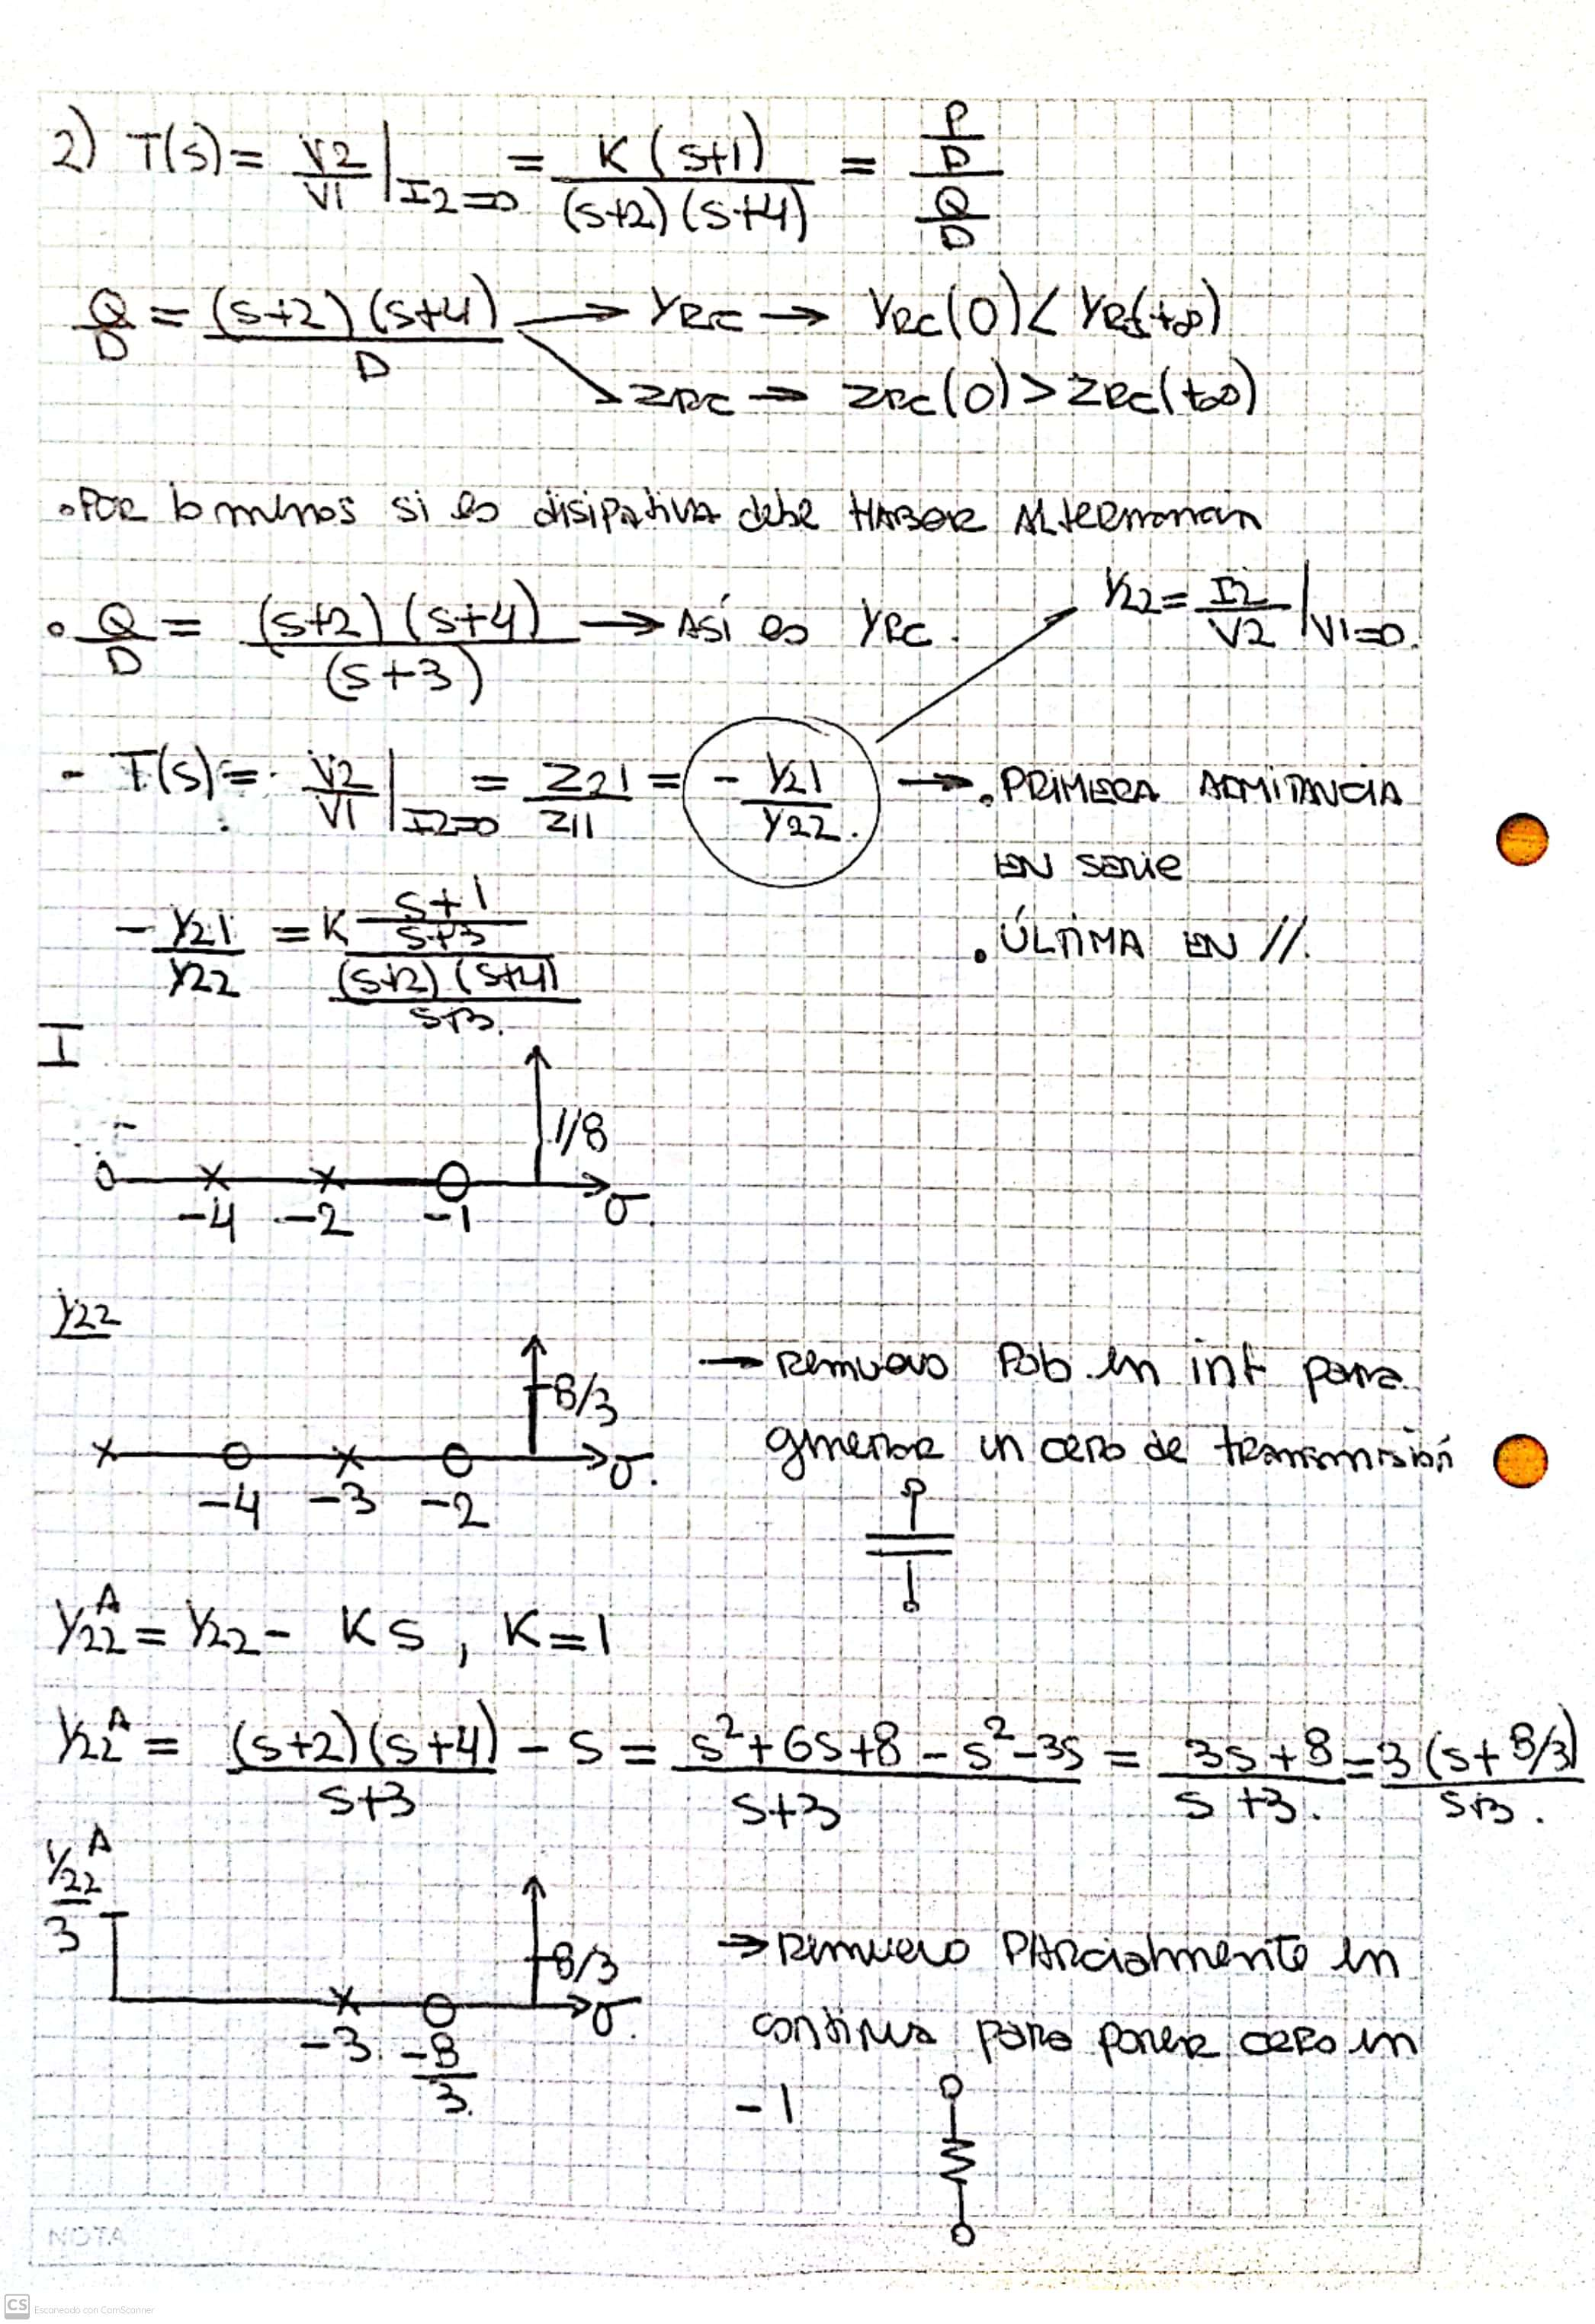

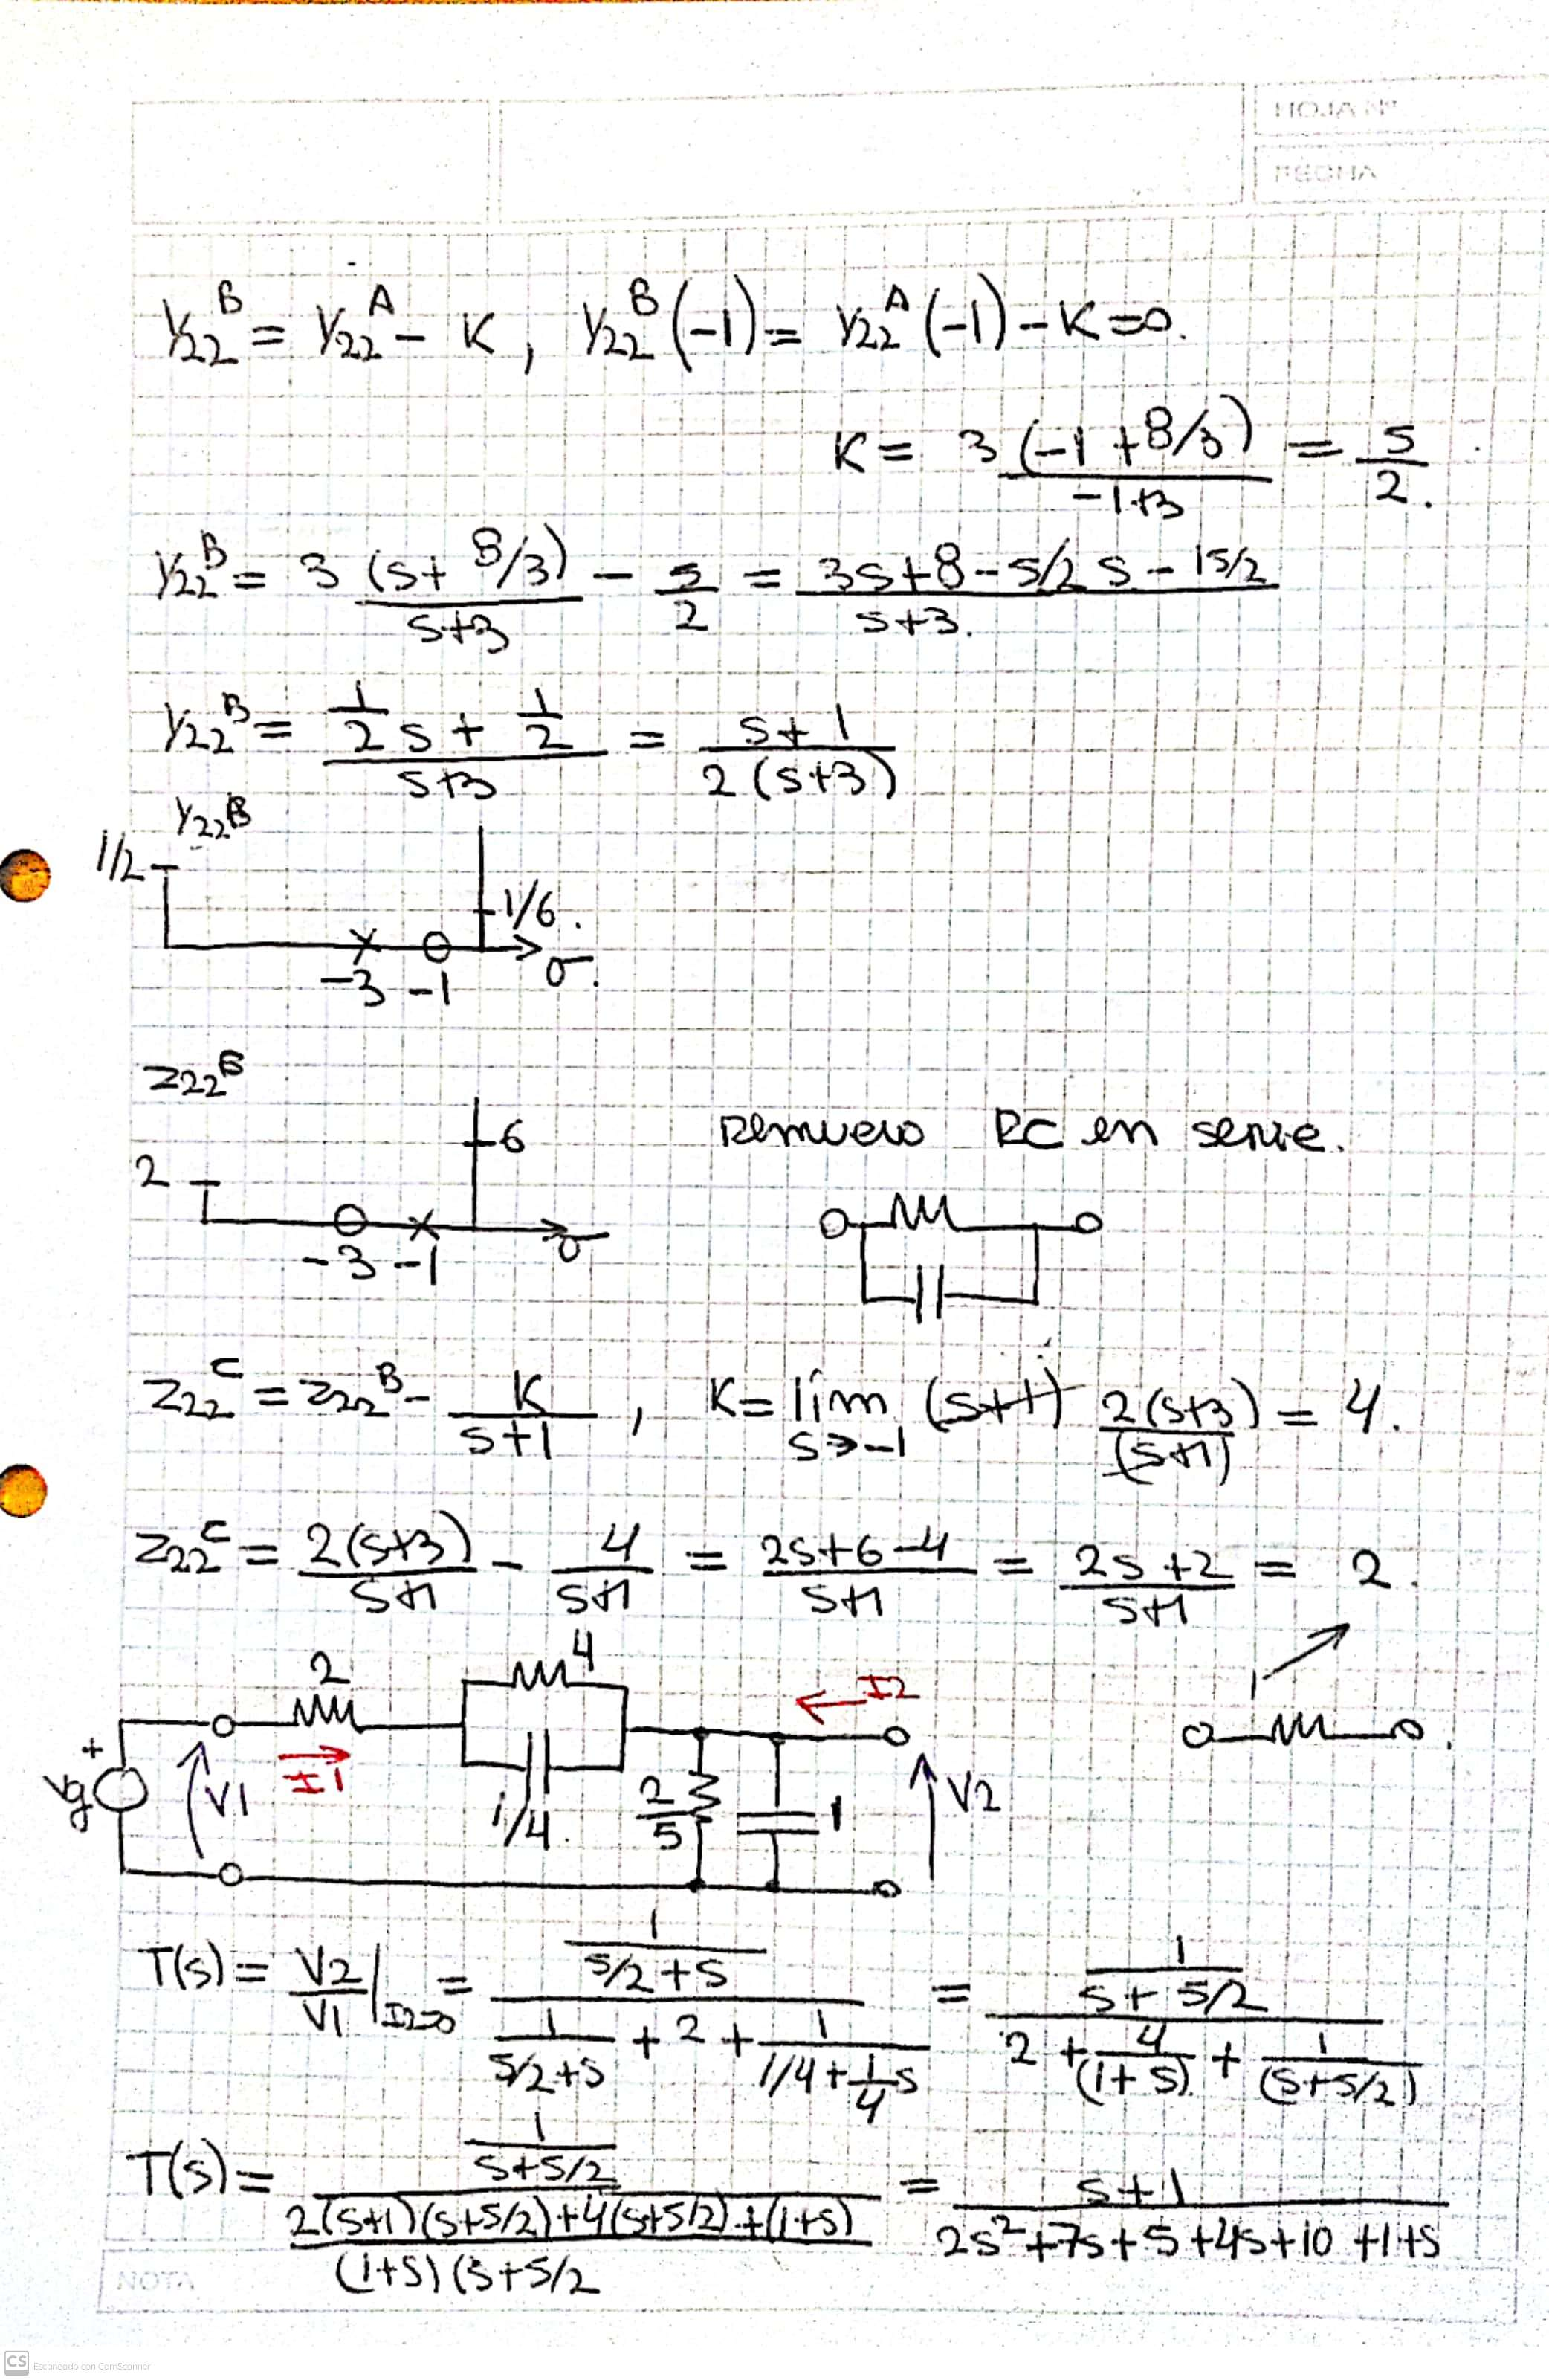

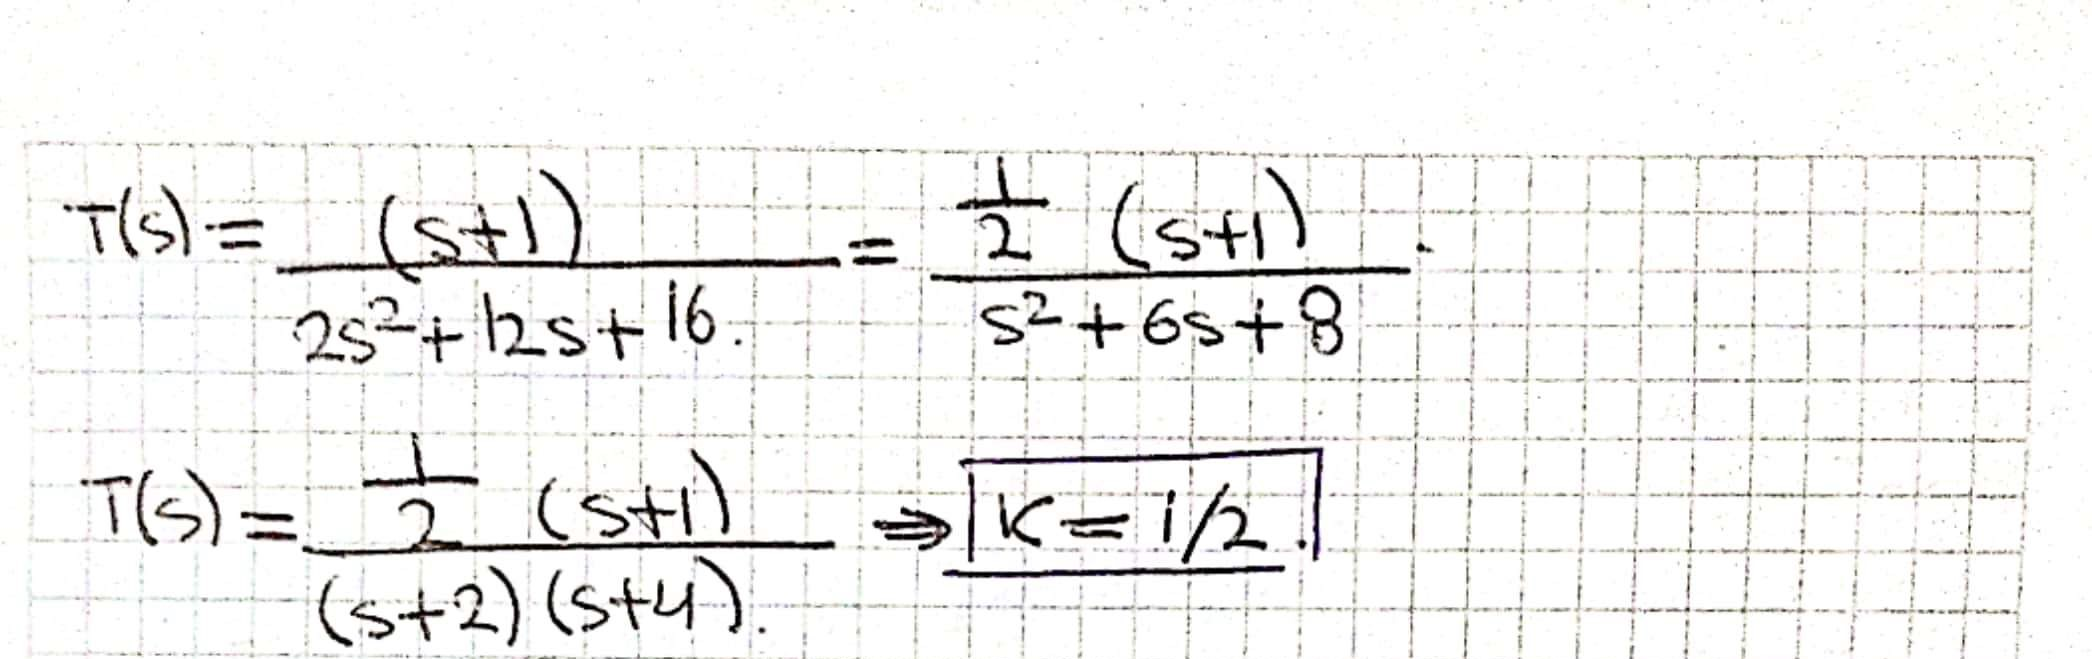

## Simulacion

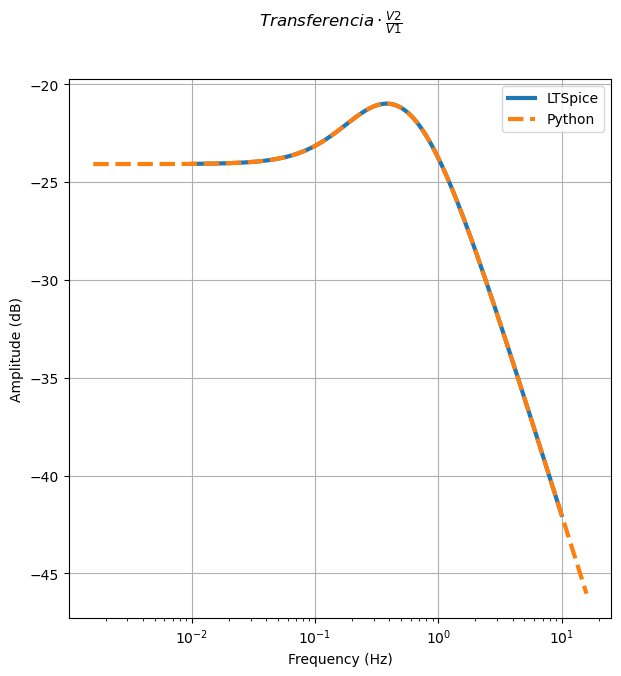

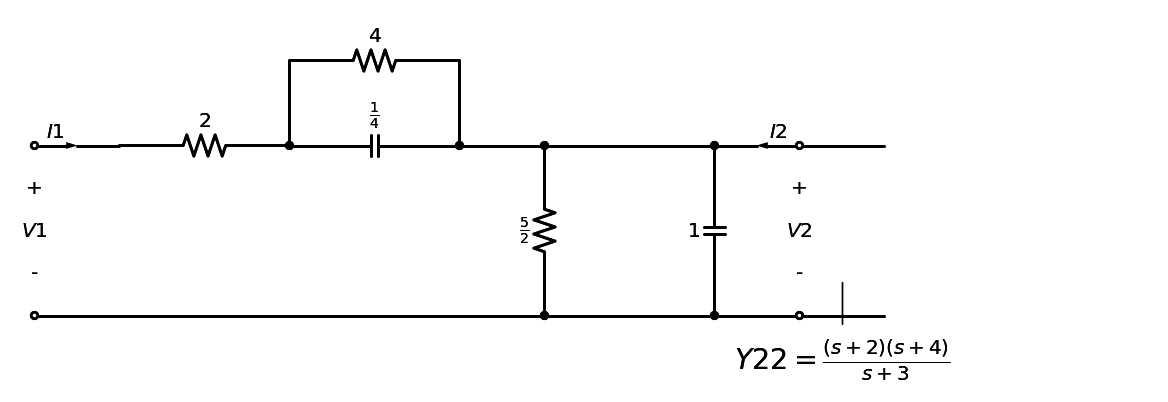

In [13]:
#%% Punto 2 YRC

l = ltspice.Ltspice('TS12_2_YRC.raw')
l.parse()






freq = l.get_frequency()
T =l.get_data('V(N002)')

fig, ax = plt.subplots(1, 1, figsize=(7,7))
fig.suptitle(r'$Transferencia \cdot \frac{V2}{V1}$')

ax.semilogx(freq, 20 * np.log10(np.abs(T)), label='LTSpice',linewidth=3)


ax.grid()
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (dB)")


num = 1/2*np.array([1,1])
den = np.array(np.convolve([1,2],[1,4]))


w,H = sig.freqs(num,den)

ax.semilogx(w/(2*np.pi),20*np.log10(np.abs(H)),label='Python',ls='--',linewidth=3)

plt.legend()
plt.show()

#%% Mediante Modulo de splane

s = sim.symbols('s ', complex=True)

Q = (s+2)*(s+4)
D = (s+3)

Y22 = Q/D


Y22_A, YC1 = splane.remover_polo_infinito(Y22)

C1 = YC1/s

Y22_B,R1 = splane.remover_valor( Y22_A, 1)

Z22_B=1/Y22_B


Z22_C, kk, R2, C2 = splane.remover_polo_sigma( Z22_B,1, isImpedance = True,  isRC = True)

Z22_D, R4=  splane.remover_valor_en_dc( Z22_C )


    
d = Drawing(unit=4) 

d = splane.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')


d = splane.dibujar_elemento_serie(d, Resistor, R4)

d = splane.dibujar_tanque_RC_serie(d, R2, C2)

d = splane.dibujar_espaciador(d)

d = splane.dibujar_elemento_derivacion(d, Resistor, R1)
d = splane.dibujar_espacio_derivacion(d)
d = splane.dibujar_elemento_derivacion(d, Capacitor, C1)

d = splane.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')

d, zz_lbl = splane.dibujar_funcion_exc_abajo(d, 
                                          'Y22',  
                                         Y22, 
                                         hacia_salida = False,
                                         k_gap_width = 0.5)

display(d)


## Punto 2 (ZRL)

## Analitico
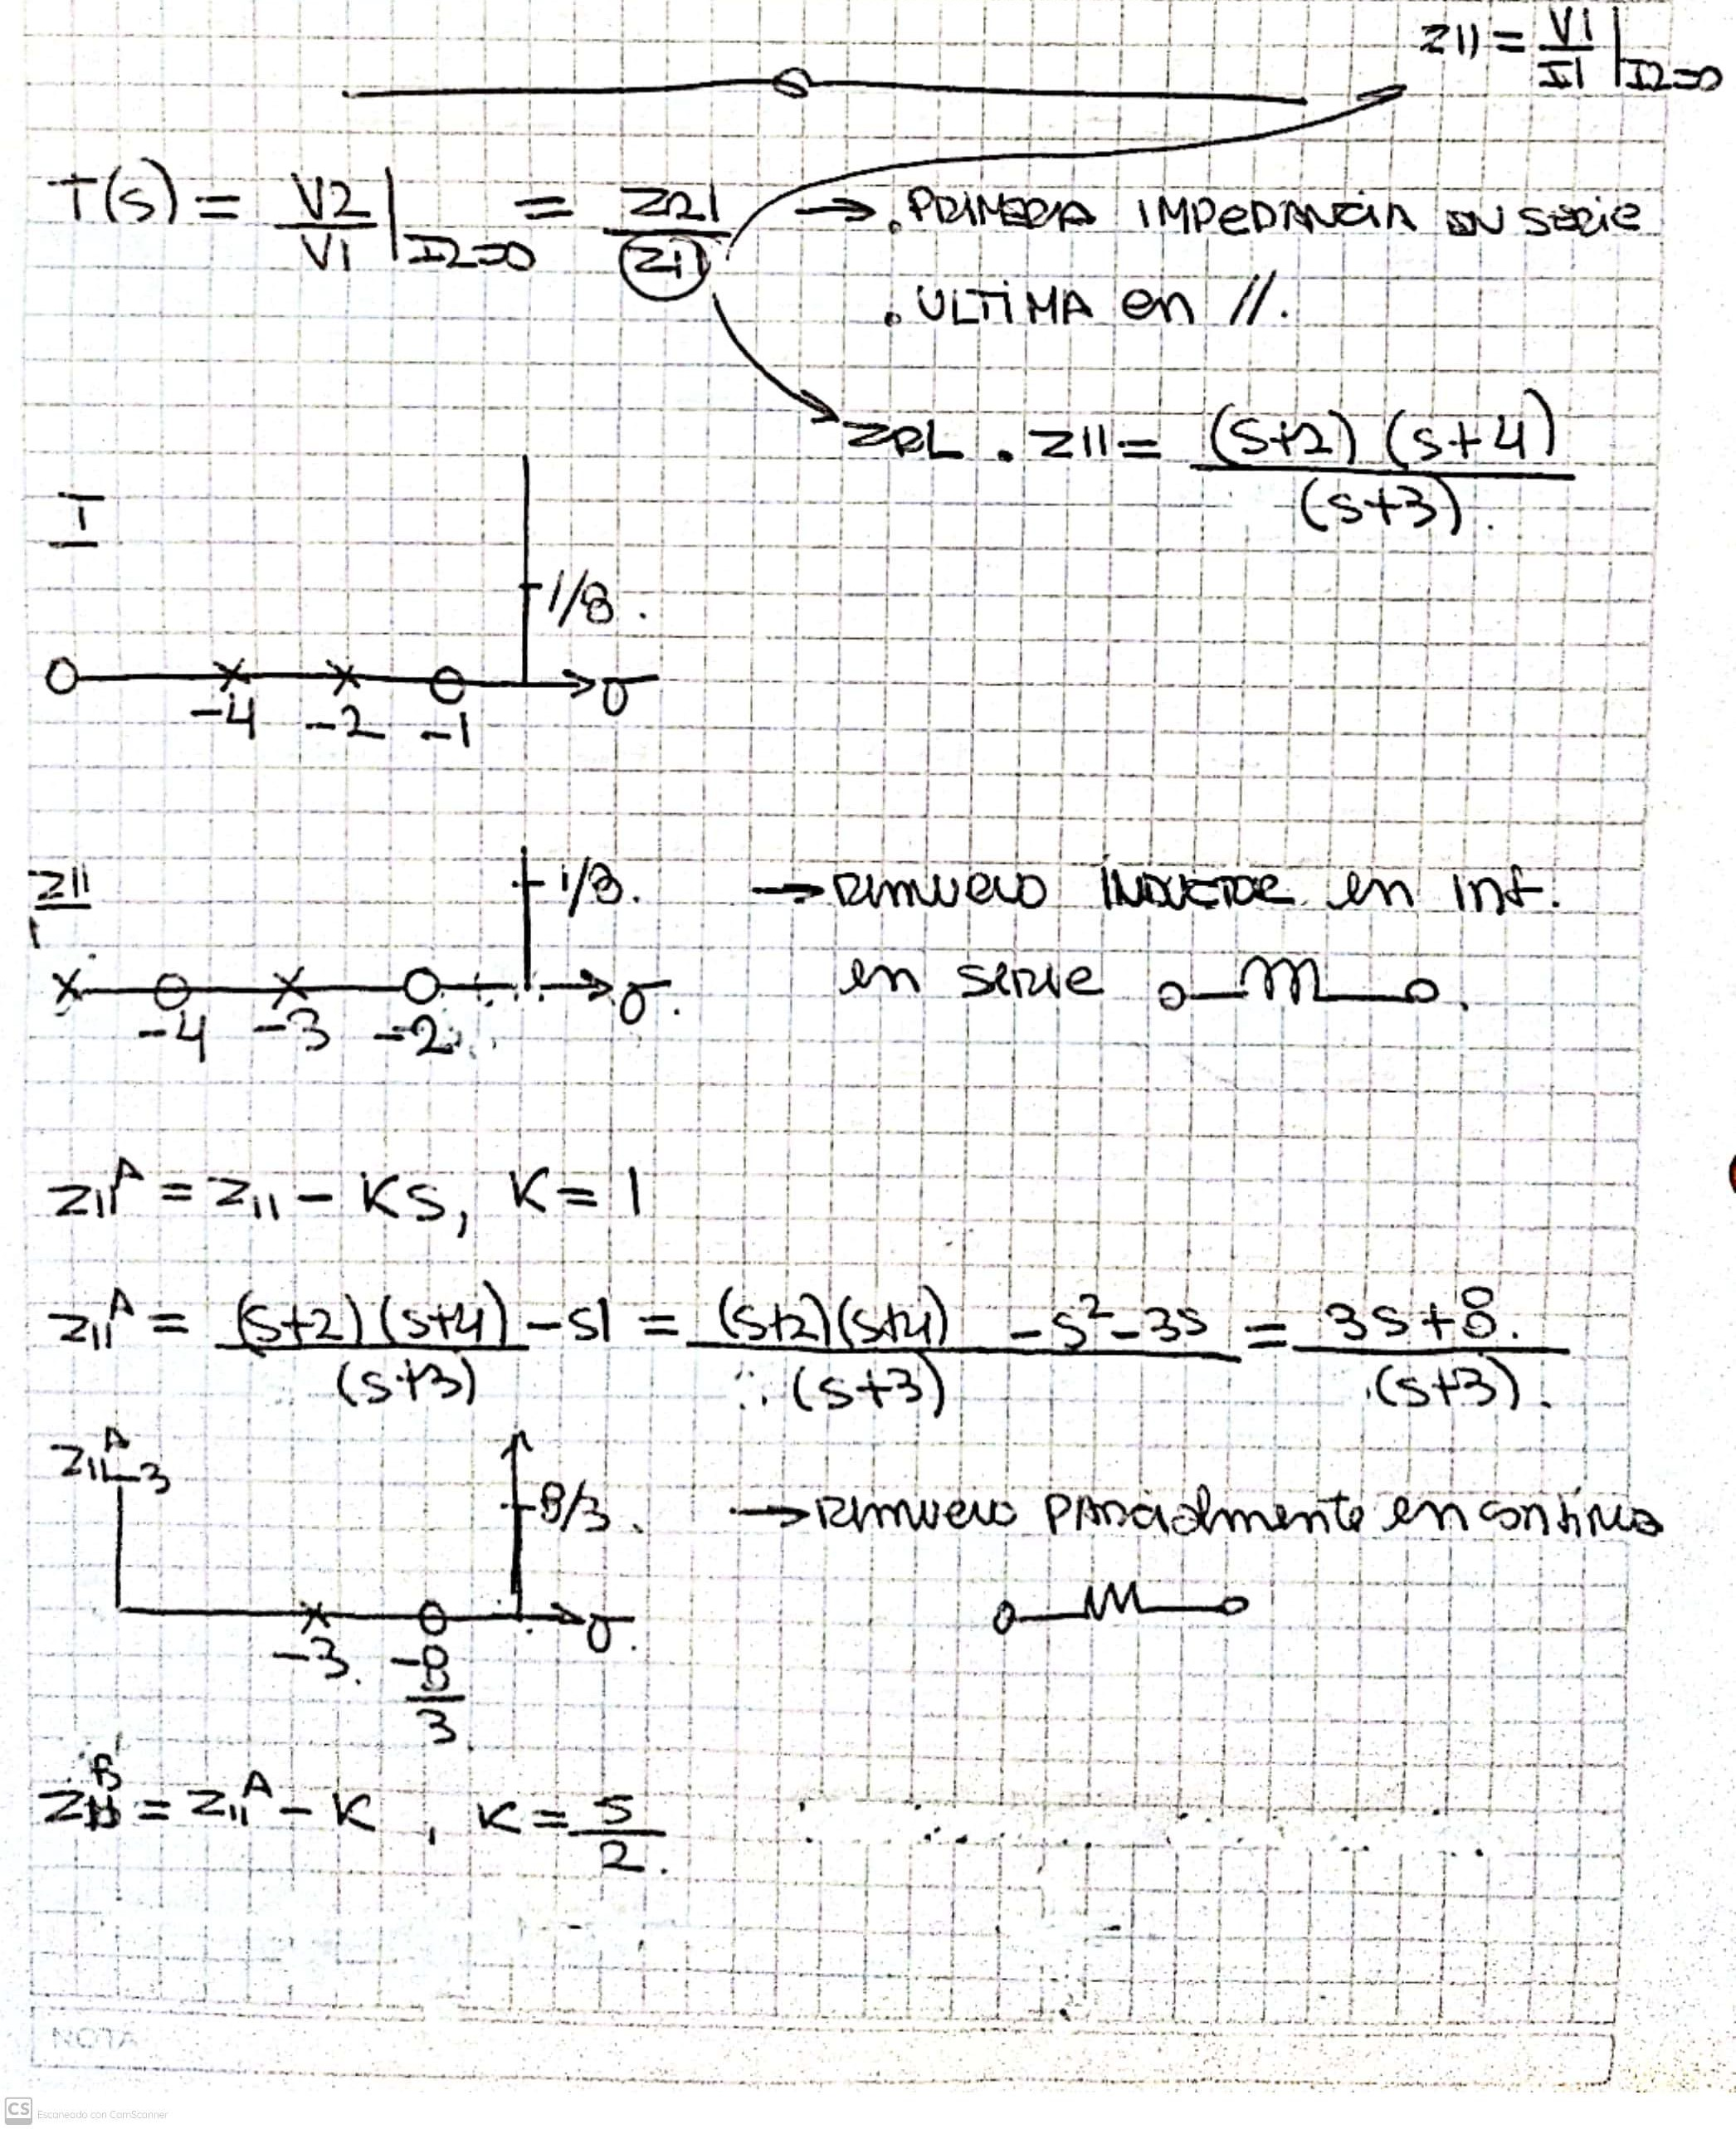

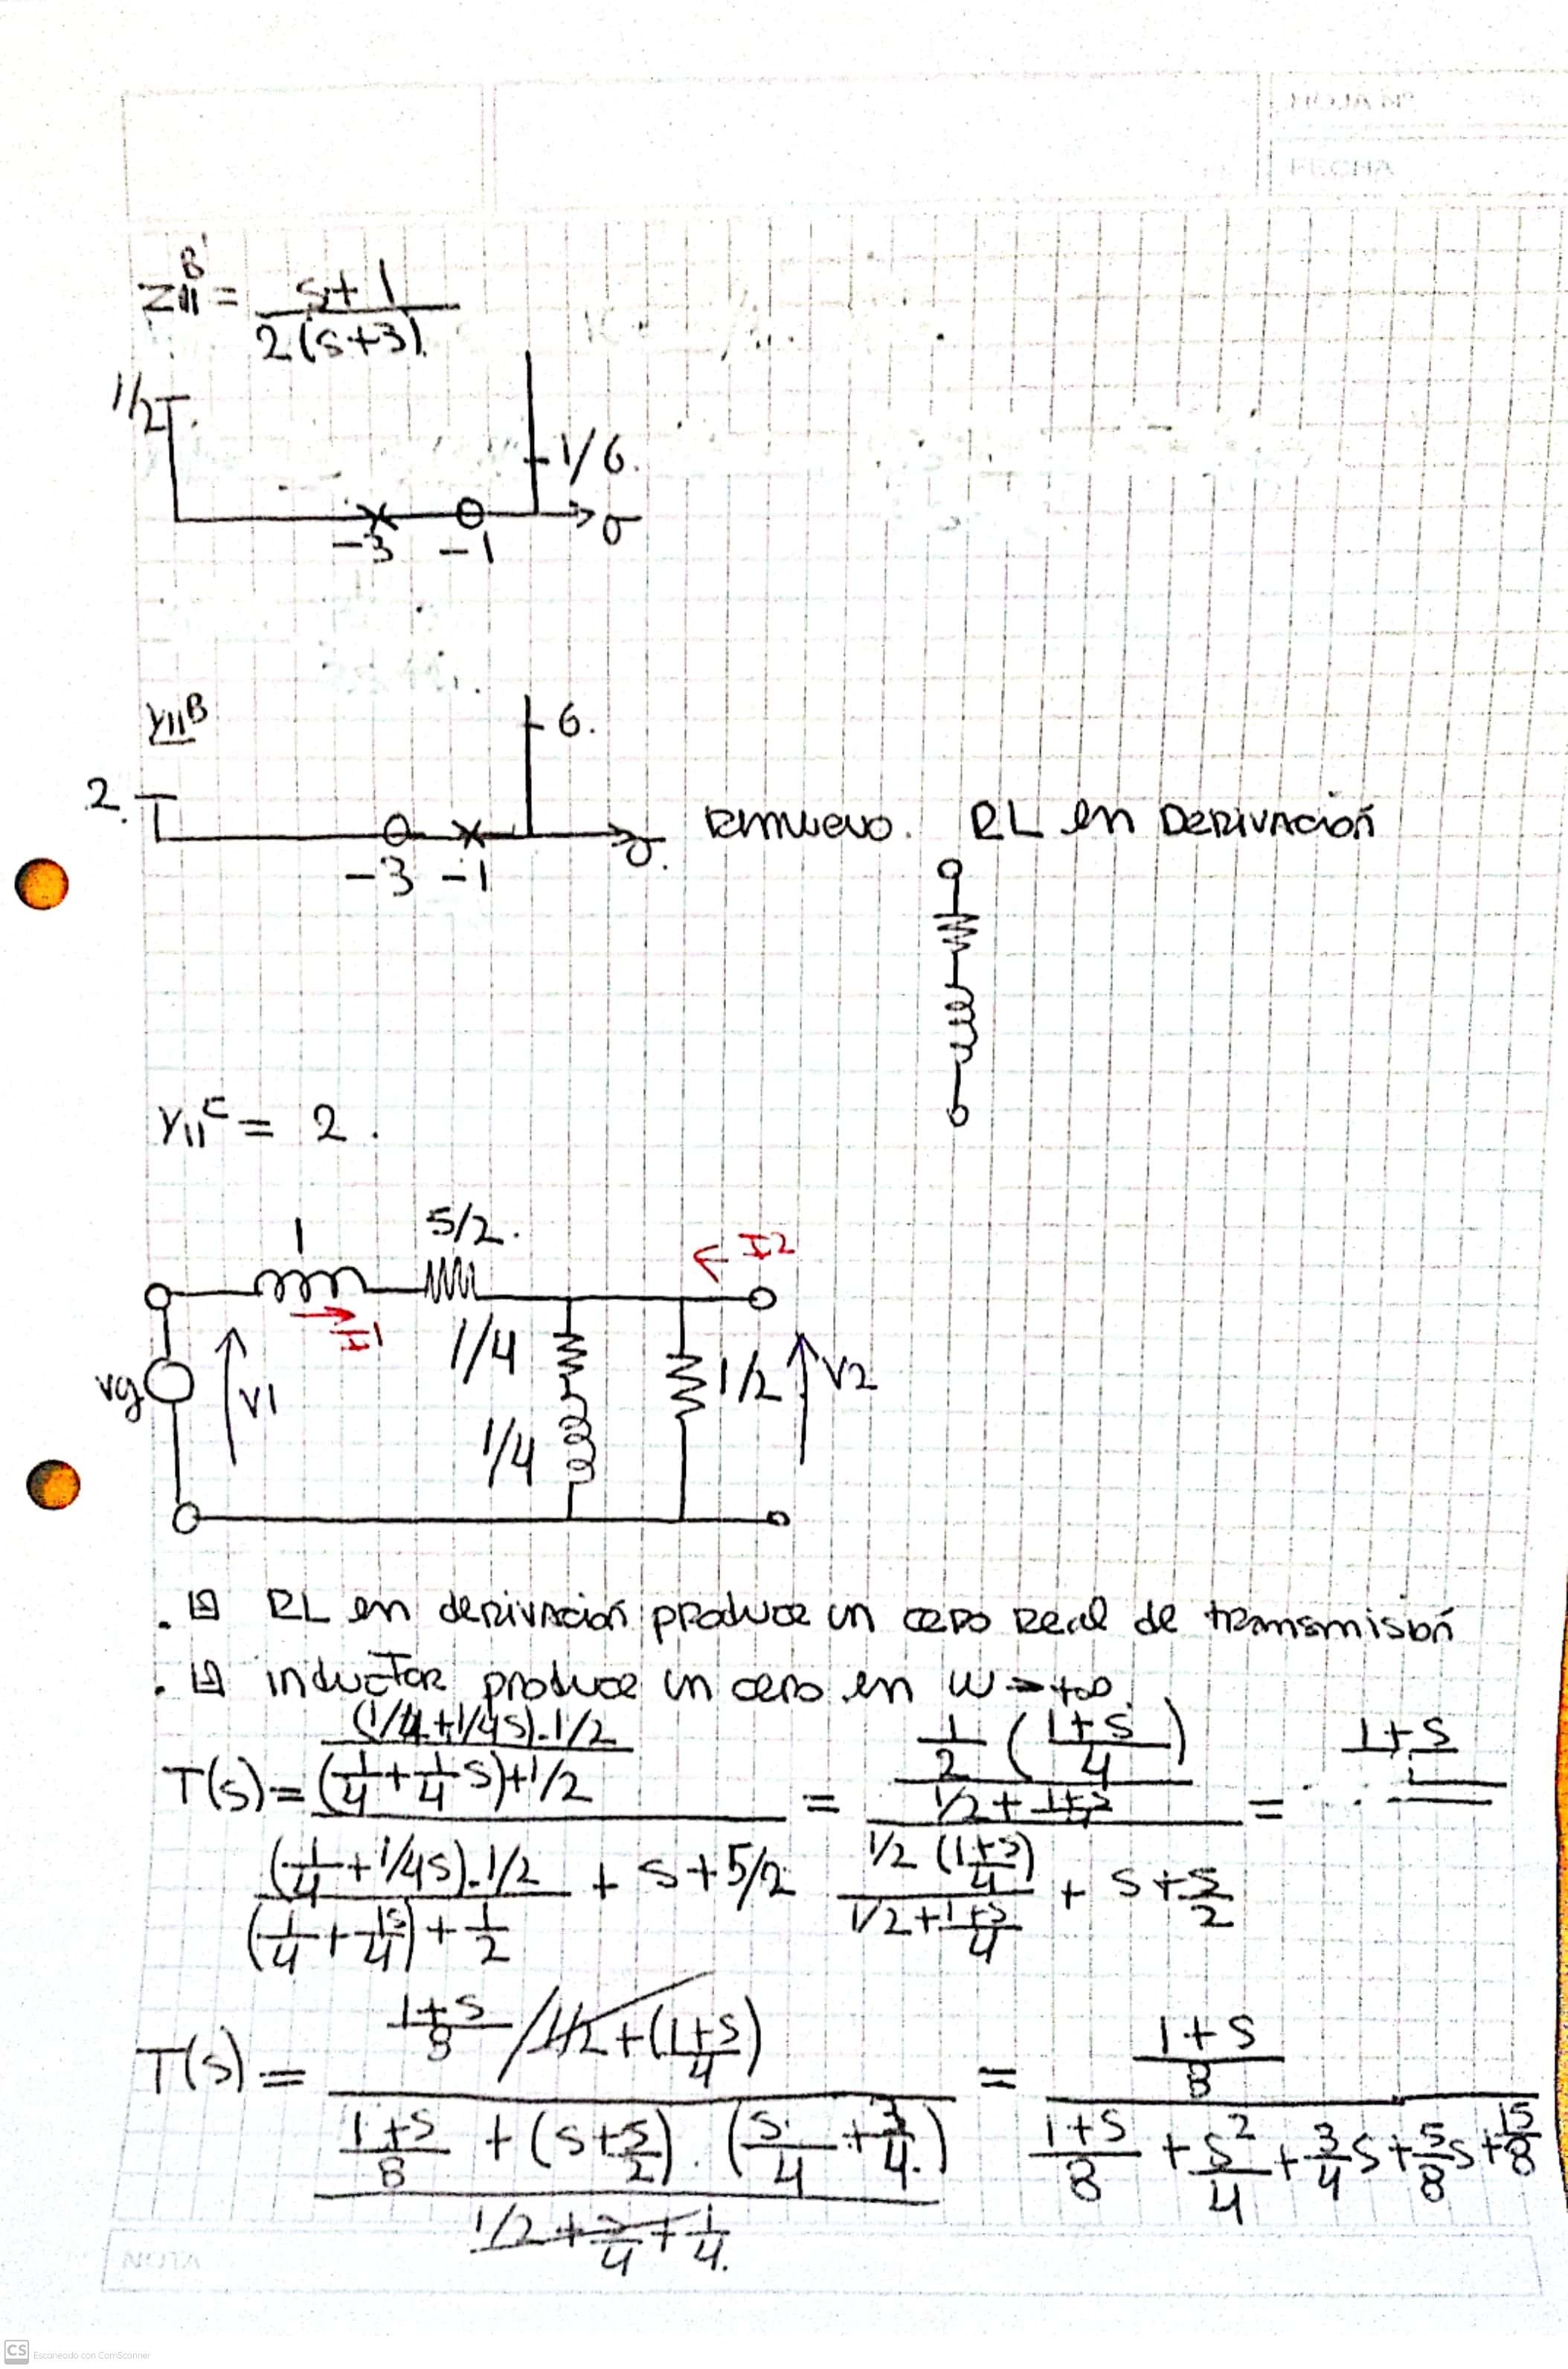

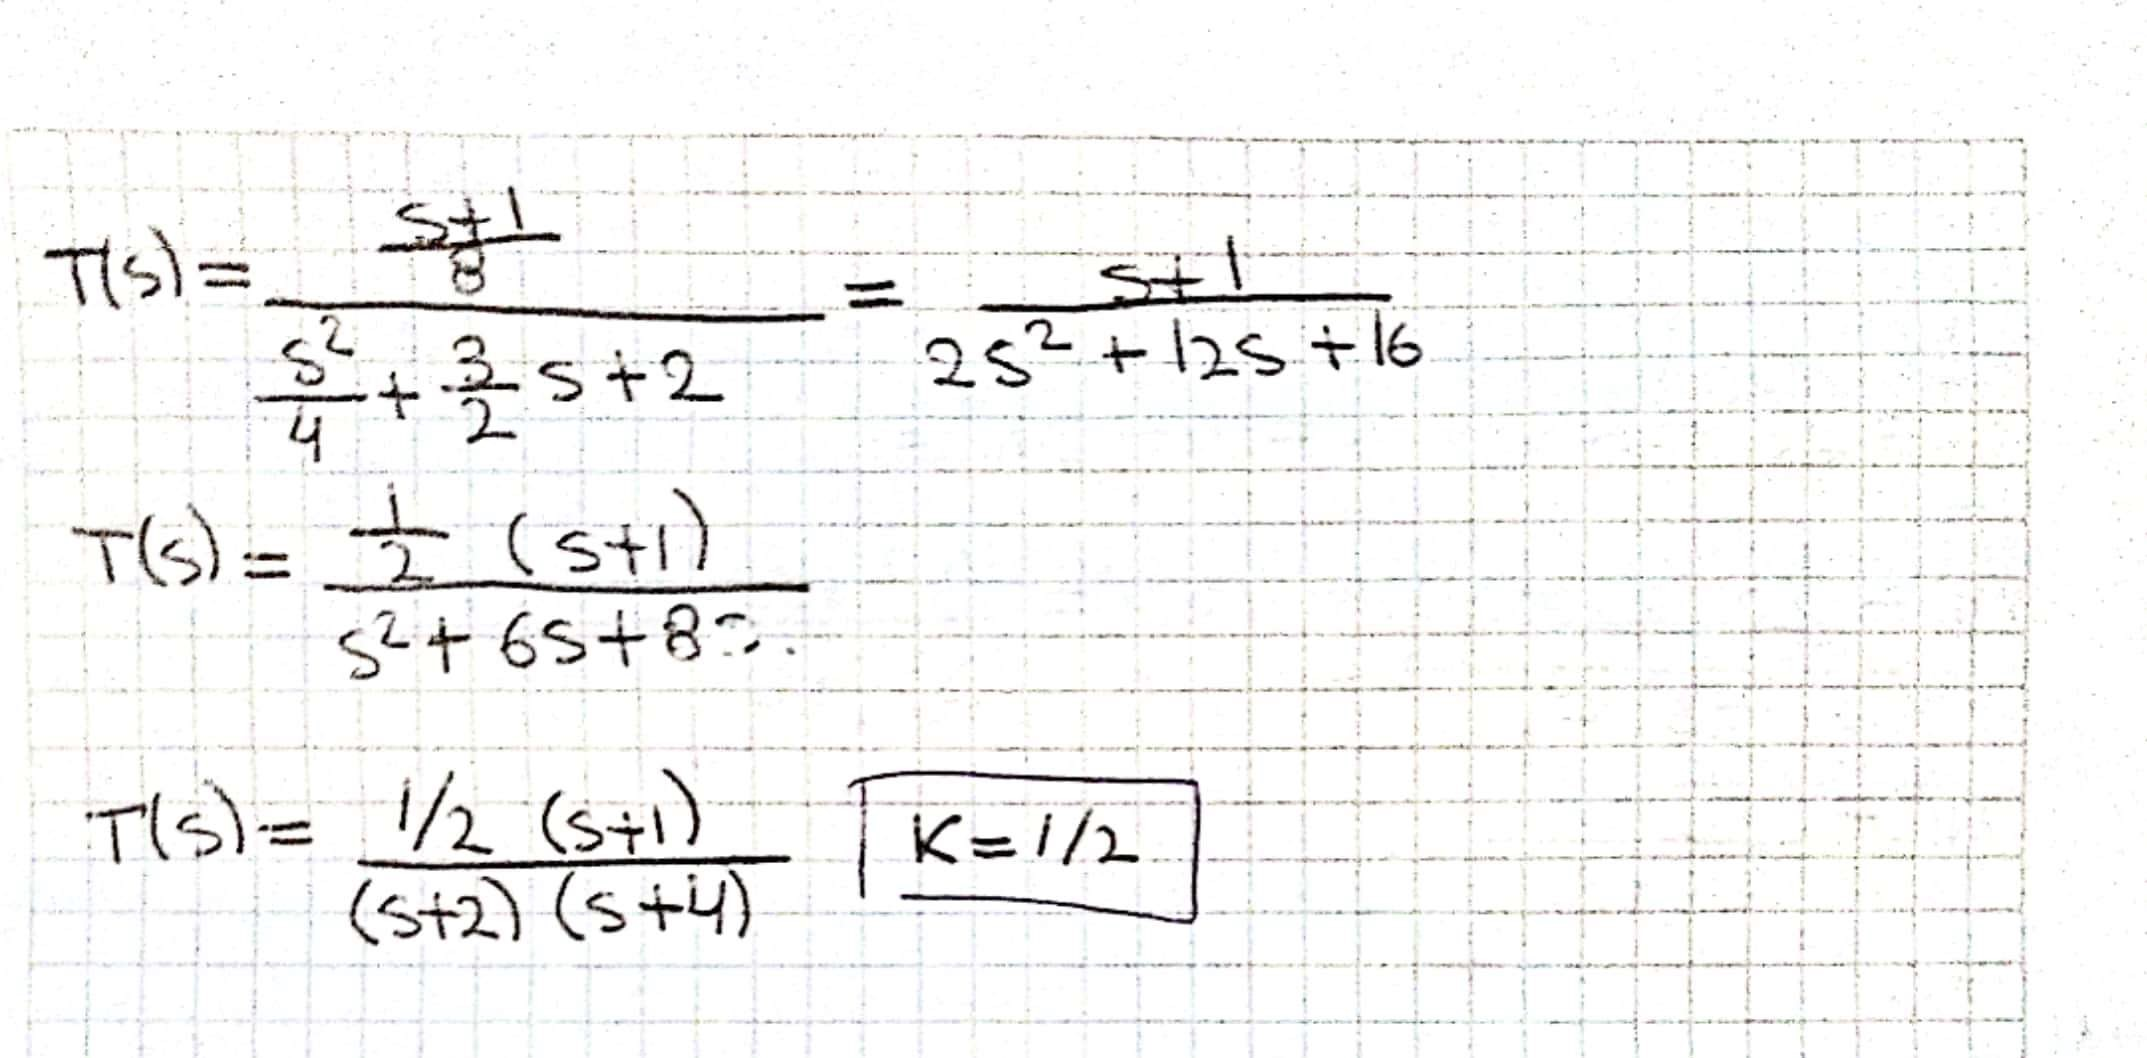

## Simulacion

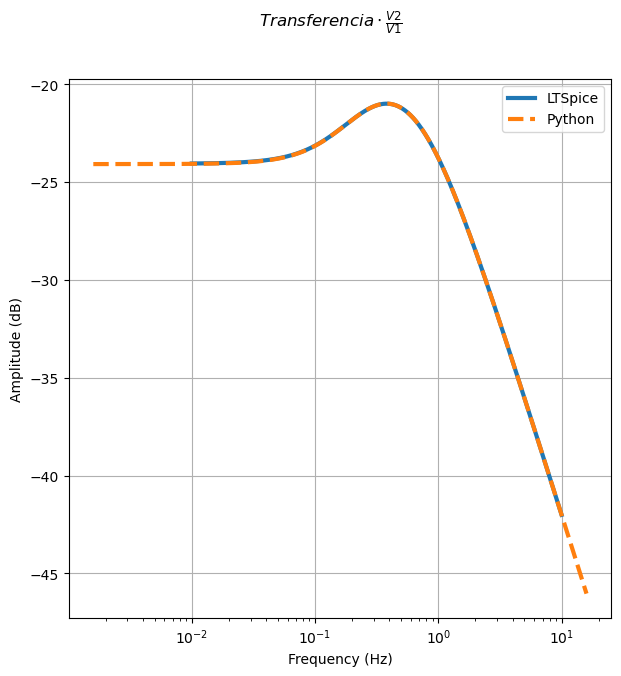

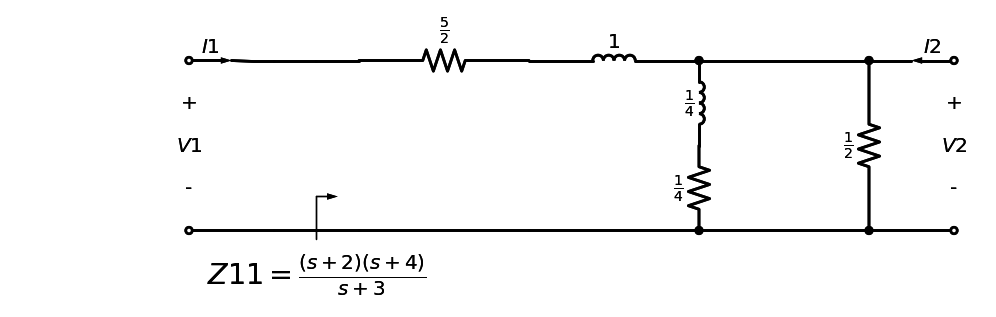

In [14]:
#%% Punto 2 ZRL

l = ltspice.Ltspice('TS12_2_ZRL.raw')
l.parse()






freq = l.get_frequency()
T =l.get_data('V(N003)')

fig, ax = plt.subplots(1, 1, figsize=(7,7))
fig.suptitle(r'$Transferencia \cdot \frac{V2}{V1}$')

ax.semilogx(freq, 20 * np.log10(np.abs(T)), label='LTSpice',linewidth=3)


ax.grid()
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (dB)")


num = 1/2*np.array([1,1])
den = np.array(np.convolve([1,2],[1,4]))


w,H = sig.freqs(num,den)

ax.semilogx(w/(2*np.pi),20*np.log10(np.abs(H)),label='Python',ls='--',linewidth=3)

plt.legend()
plt.show()

#%% Mediante Modulo de splane

s = sim.symbols('s ', complex=True)

Q = (s+2)*(s+4)
D = (s+3)

Z11 = Q/D


Z11_A, ZL1 = splane.remover_polo_infinito(Z11)

L1 = ZL1/s

Z11_B,R1 = splane.remover_valor( Z11_A, 1)

Y11_B=1/Z11_B


Y11_C, kk, R2, L2 = splane.remover_polo_sigma( Y11_B,1, isImpedance = False,  isRC = False)

Y11_D, G3=  splane.remover_valor_en_dc( Y11_C )

R3=1/G3
    
d = Drawing(unit=4) 

d = splane.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d, zz_lbl = splane.dibujar_funcion_exc_abajo(d, 
                                          'Z11',  
                                         Z11, 
                                         hacia_salida = True,
                                         k_gap_width = 0.5)


d = splane.dibujar_elemento_serie(d, Resistor, R1)

#d = splane.dibujar_espaciador(d)

d = splane.dibujar_elemento_serie(d, Inductor, L1)

d = splane.dibujar_tanque_RL_derivacion(d, R2, L2)

d = splane.dibujar_espacio_derivacion(d)

d = splane.dibujar_elemento_derivacion(d, Resistor, R3)


d = splane.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')



display(d)